In [1]:
import pandas as pd
import numpy as np
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_palette('deep')

df = pd.read_csv('dataset/train.csv')
df_test = pd.read_csv('dataset/test.csv')
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [2]:
df.drop('Id', axis=1, inplace=True)
id_array_test = df_test['Id'].values
df_test.drop('Id', axis=1, inplace=True)

### Outliers

By referring to the Ames Housing Dataset link provided in the Acknowledgements, you'll see that the author outlines there are some outliers that must be treated:

" Although all known errors were corrected in the data, no observations have been removed due to unusual values and all final residential sales from the initial data set are included in the data presented with this article. There are five observations that an instructor may wish to remove from the data set before giving it to students (a plot of SALE PRICE versus GR LIV AREA will quickly indicate these points). Three of them are true outliers (Partial Sales that likely don’t represent actual market values) and two of them are simply unusual sales (very large houses priced relatively appropriately). I would recommend removing any houses with more than 4000 square feet from the data set (which eliminates these five unusual observations) before assigning it to students. "

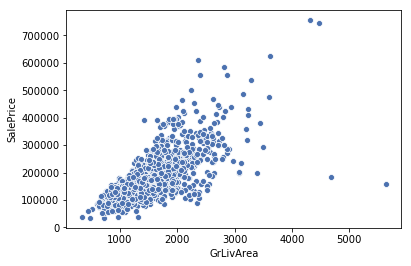

In [3]:
#Plot of SalePrice vs GrLivArea
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=df)

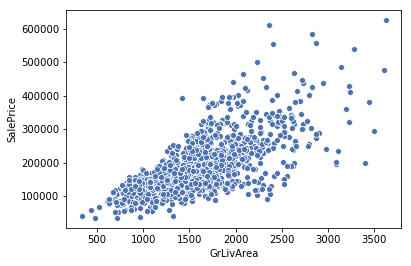

In [4]:
#Removing datapoints with GrLivArea greater than 4000 as they probably are outliers
df = df[df['GrLivArea'] < 4000]
ax = sns.scatterplot(y="SalePrice", x="GrLivArea", data=df)

## Handling missing values

In [5]:
y_train = df['SalePrice'].values
df.drop('SalePrice', axis=1, inplace=True)

df_cum = pd.concat([df, df_test], ignore_index=True)

In [6]:
#We'll fill the columns which have 'NA' as a category in their description appropriately.
described_cols = ['Alley', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'Fence', 'MiscFeature', 'PoolQC']
df_cum[described_cols] = df_cum[described_cols].fillna('NA')

In [7]:
#Now we'll count the missing values in the remaining columns and plot a graph
from misc_functions import *
missing_val = np.array(get_na_count(df_cum))

[Text(0, 0, 'MSZoning'),
 Text(0, 0, 'LotFrontage'),
 Text(0, 0, 'Utilities'),
 Text(0, 0, 'Exterior1st'),
 Text(0, 0, 'Exterior2nd'),
 Text(0, 0, 'MasVnrType'),
 Text(0, 0, 'MasVnrArea'),
 Text(0, 0, 'BsmtFinSF1'),
 Text(0, 0, 'BsmtFinSF2'),
 Text(0, 0, 'BsmtUnfSF'),
 Text(0, 0, 'TotalBsmtSF'),
 Text(0, 0, 'Electrical'),
 Text(0, 0, 'BsmtFullBath'),
 Text(0, 0, 'BsmtHalfBath'),
 Text(0, 0, 'KitchenQual'),
 Text(0, 0, 'Functional'),
 Text(0, 0, 'GarageYrBlt'),
 Text(0, 0, 'GarageCars'),
 Text(0, 0, 'GarageArea'),
 Text(0, 0, 'SaleType')]

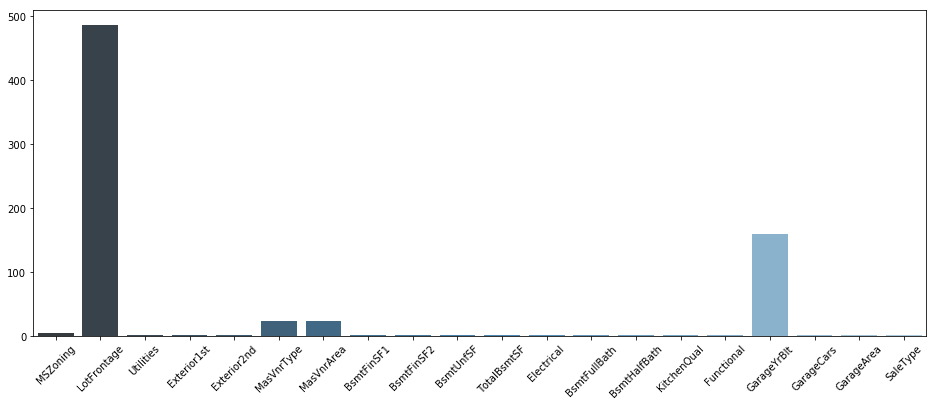

In [8]:
plt.figure(figsize=(16, 6))
ax = sns.barplot(x=missing_val[:,0], y=missing_val[:,1], palette="Blues_d")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

/Users/shikgup2/miniconda3/envs/p35/lib/python3.5/site-packages/matplotlib/figure.py:448: UserWarning: Matplotlib is currently using module://ipykernel.pylab.backend_inline, which is a non-GUI backend, so cannot show the figure.
  % get_backend())


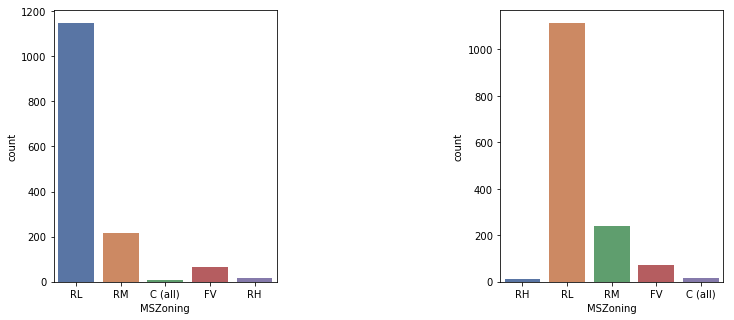

In [9]:
#MSZoning
fig, ax =fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
sns.countplot(df['MSZoning'], ax=ax[0])
sns.countplot(df_test['MSZoning'], ax=ax[1])
plt.subplots_adjust(wspace=1)
fig.show()

In [10]:
#We can see that almost all the values in both test and train are 'RL'. We'll replace the missing vslues with it.
df_cum['MSZoning'] = df_cum['MSZoning'].fillna('RL')

60.0

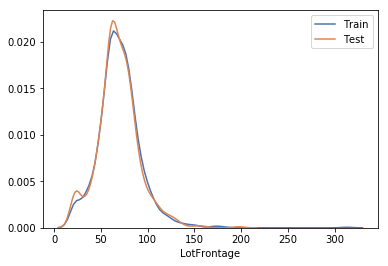

In [11]:
#Lot Frontage
sns.distplot(df['LotFrontage'], hist = False, kde = True, label='Train')
sns.distplot(df_test['LotFrontage'], hist = False, kde = True, label='Test')
df_cum['LotFrontage'].mode(dropna=True)[0]

In [12]:
#Looking at the distribution for both test and train (almost same) we can replace the missing values with the mode.
df_cum['LotFrontage'] = df_cum['LotFrontage'].fillna(df_cum['LotFrontage'].mode(dropna=True)[0])

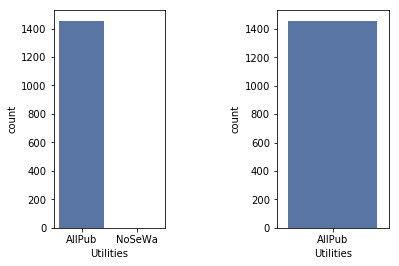

In [13]:
#Utilities
fig, ax =plt.subplots(1,2)
sns.countplot(df['Utilities'], ax=ax[0])
sns.countplot(df_test['Utilities'], ax=ax[1])
plt.subplots_adjust(wspace=1)
fig.show()

In [14]:
#We can see that the test data only has one category in utilities hence rendering it useless for the prediction. 
#We can drop this column.
df_cum.drop('Utilities', axis=1, inplace=True)

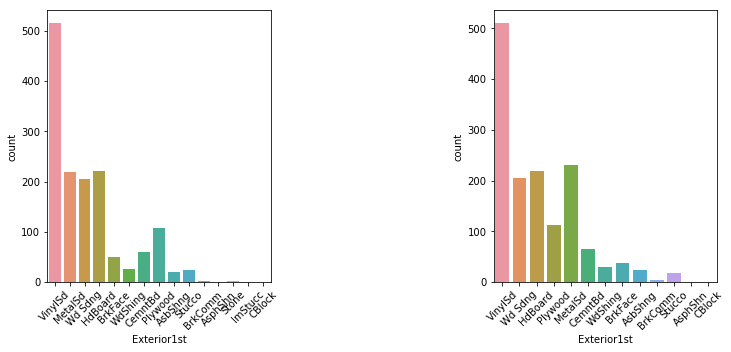

In [15]:
#Exterior1st
fig, ax =fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(12,5))
a1 = sns.countplot(df['Exterior1st'], ax=ax[0])
a2 = sns.countplot(df_test['Exterior1st'], ax=ax[1])
plt.subplots_adjust(wspace=1)
a1.set_xticklabels(a1.get_xticklabels(), rotation=45)
a2.set_xticklabels(a2.get_xticklabels(), rotation=45)
fig.show()

In [16]:
#We'll go with the most popular Exterior1st as it is consistent in both test and train.
df_cum['Exterior1st'] = df_cum['Exterior1st'].fillna(df_cum['Exterior1st'].mode(dropna=True)[0])
df_cum['Exterior2nd'] = df_cum['Exterior2nd'].fillna(df_cum['Exterior2nd'].mode(dropna=True)[0])
df_cum['MasVnrType'] = df_cum['MasVnrType'].fillna(df_cum['MasVnrType'].mode(dropna=True)[0])
df_cum['MasVnrArea'] = df_cum['MasVnrArea'].fillna(df_cum['MasVnrArea'].mode(dropna=True)[0])
df_cum['Electrical'] = df_cum['Electrical'].fillna(df_cum['Electrical'].mode(dropna=True)[0])
df_cum['KitchenQual'] = df_cum['KitchenQual'].fillna(df_cum['KitchenQual'].mode(dropna=True)[0])
df_cum['Functional'] = df_cum['Functional'].fillna(df_cum['Functional'].mode(dropna=True)[0])
df_cum['GarageCars'] = df_cum['GarageCars'].fillna(df_cum['GarageCars'].mode(dropna=True)[0])
df_cum['GarageArea'] = df_cum['GarageArea'].fillna(df_cum['GarageArea'].mean())
df_cum['SaleType'] = df_cum['SaleType'].fillna(df_cum['SaleType'].mode(dropna=True)[0])

In [17]:
#For BsmtFinSF1 we observed the only datapoint for which the value was missing had BsmtFinType1 as NA i.e 
#there is no basement. So we can fill the SF as 0
df_cum['BsmtFinSF1'] = df_cum['BsmtFinSF1'].fillna(0)
#Same goes for BsmtFinSF2
df_cum['BsmtFinSF2'] = df_cum['BsmtFinSF2'].fillna(0)
#Same data point is valid for BsmtUnfSF and TotalBsmtSF. We can fill all with zeros.
df_cum['BsmtUnfSF'] = df_cum['BsmtUnfSF'].fillna(0)
df_cum['TotalBsmtSF'] = df_cum['TotalBsmtSF'].fillna(0)

2116    0.0
2184    0.0
Name: TotalBsmtSF, dtype: float64


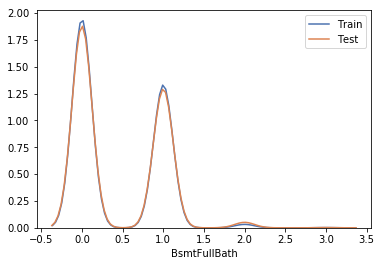

In [18]:
#BsmtFullBath
var = 'BsmtFullBath'
sns.distplot(df[var], hist = False, kde = True, label='Train')
sns.distplot(df_test[var], hist = False, kde = True, label='Test')
tmp = df_cum[df_cum[var].isnull()]
print (tmp['TotalBsmtSF'])

#We observe that the total bsmt area is zero for both the datapoints so we can replace the nan with 0
df_cum['BsmtFullBath'] = df_cum['BsmtFullBath'].fillna(0)
#Same goes for BsmtHalfBath
df_cum['BsmtHalfBath'] = df_cum['BsmtHalfBath'].fillna(0)

In [24]:
#GarageYrBlt
#For the datapoints where GarageYrBlt is Nan, we check whether GarageType is NA or not. NA means the house has no
#garage and we can keep it as '0'. As we will convert all the year columns to categorical using '0' will not be an 
#issue. For the rest of the datapoints we will replace Nan with the mode.
mode = (df_cum['GarageYrBlt'].mode(dropna=True))[0]
for index, row in df_cum.iterrows():
    if np.isnan(row['GarageYrBlt']):
        if row['GarageType'] == 'NA':
            df_cum.iloc[index, df_cum.columns.get_loc('GarageYrBlt')] = 0.0
        else:
            df_cum.iloc[index, df_cum.columns.get_loc('GarageYrBlt')] = mode

### Categorical Data

We'll convert categorical data to a form suitable to for model

In [44]:
df_cum = pd.get_dummies(df_cum)
df_cum

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978.0,0.0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486.0,0.0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216.0,0.0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655.0,0.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,160,21.0,1936,4,7,1970,1970,0.0,0.0,0.0,...,0,0,0,1,0,0,0,0,1,0
1455,160,21.0,1894,4,5,1970,1970,0.0,252.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1456,20,160.0,20000,5,7,1960,1996,0.0,1224.0,0.0,...,0,0,0,1,1,0,0,0,0,0
1457,85,62.0,10441,5,5,1992,1992,0.0,337.0,0.0,...,0,0,0,1,0,0,0,0,1,0


### Handling NA

In [45]:
df_cum = df_cum.fillna(0)

In [60]:
df_val = df.copy()


### Splitting test and train data back and applying linear regression

In [46]:
X_cum = df_cum.to_numpy()
standardScalerX = StandardScaler()
X_cum = standardScalerX.fit_transform(X_cum)

In [47]:
X_train = X_cum[:1456, :]
X_test = X_cum[1456:, :]
X_train.shape, X_test.shape

((1456, 287), (1459, 287))

In [49]:
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [51]:
y_pred = regressor.predict(X_test)

In [57]:
y_pred.shape, id_array_test.shape

((1459,), (1459,))

In [59]:
final_result = np.concatenate([id_array_test.reshape(-1,1), y_pred.reshape(-1,1)], axis=1)

index_array = np.array([x for x in range(1459)])
submission_df = pd.DataFrame(data=final_result, index=index_array, columns=['Id', 'SalePrice'])
convert_dict = {'Id': int}

submission_df = submission_df.astype(convert_dict)

submission_df.to_csv('submission_get_dummies.csv',index=False)